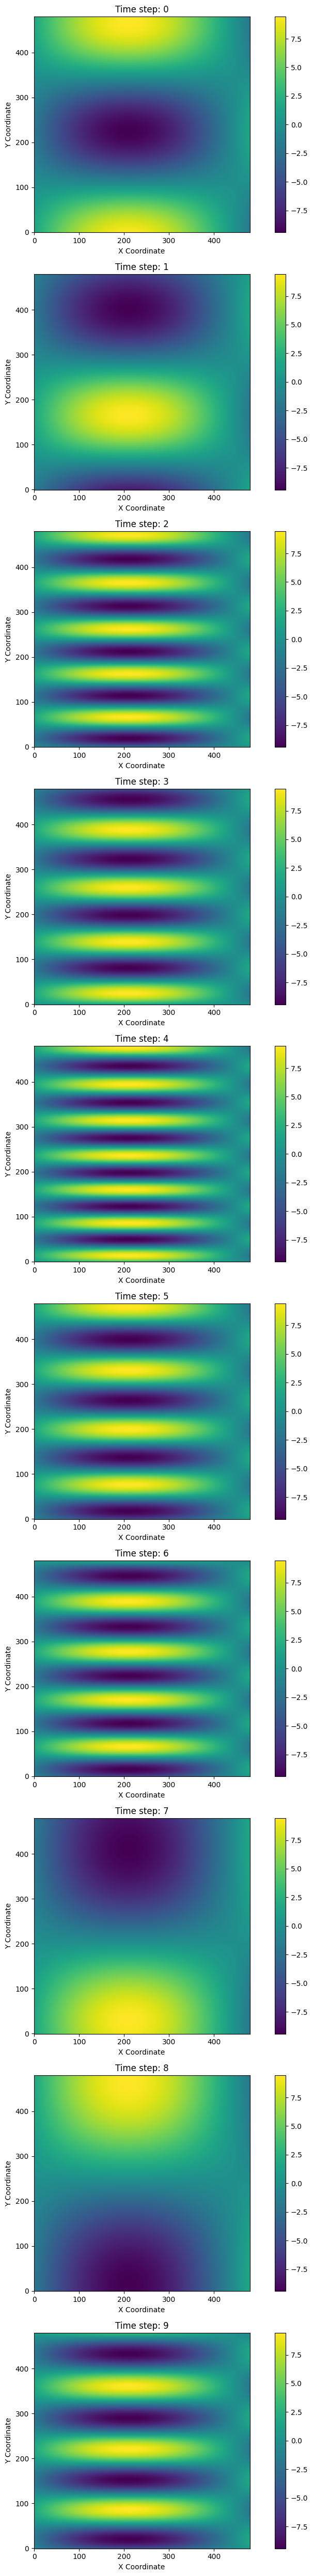

In [3]:
import xarray as xr
import matplotlib.pyplot as plt

def plot_vector_field(nc_file_path):
    # Load the dataset
    ds = xr.open_dataset(nc_file_path)

    # Select the variable of interest, e.g., vozocrtx
    vozocrtx = ds['vozocrtx']

    # Number of plots to generate (for simplicity, we plot a few time steps)
    num_plots = min(10, len(ds['time_counter']))  # Adjust the range as necessary

    # Set up the figure
    plt.figure(figsize=(10, 5 * num_plots))

    for i in range(num_plots):
        plt.subplot(num_plots, 1, i + 1)
        plt.imshow(vozocrtx[i, 0, :, :], origin='lower')  # Adjust indexing if depth levels are multiple
        plt.colorbar()
        plt.title(f'Time step: {i}')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')

    plt.tight_layout()
    plt.show()

    # Close the dataset
    ds.close()

# Path to your NetCDF file
path = "../simulation/data/DoubleGyre2D"
file_path = path + "/" + "doublegyreU.nc"
plot_vector_field(file_path)

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import imageio

def create_gif(nc_file_path, output_path, max_frames=60):
    # Load the dataset
    ds = xr.open_dataset(nc_file_path)

    # Select the variable of interest, e.g., vozocrtx
    vozocrtx = ds['vozocrtx']

    # Prepare the frames list
    images = []
    image_names = []

    # Generate each frame for the GIF
    for i in range(min(max_frames, len(ds['time_counter']))):
        plt.figure(figsize=(10, 8))
        im = plt.imshow(vozocrtx[i, 0, :, :], origin='lower', animated=True)
        plt.colorbar(im, orientation='vertical')
        plt.title(f'Time step: {i}')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        
        # Save plot to a temporary PNG file
        filename = f'frame_{i}.png'
        plt.savefig(filename)
        plt.close()
        
        # Append the filename to images list
        images.append(imageio.imread(filename))
        image_names.append(filename)

    # Save as a GIF
    imageio.mimsave(output_path, images, fps=2)  # fps controls the speed of the GIF

    # Clean up the temporary files
    import os
    for filename in image_names:
        os.remove(filename)

    # Close the dataset
    ds.close()

# Path to your NetCDF file and output GIF
# file_path = 'path_to_your_file.nc'
path = "../simulation/data/DoubleGyre2D"
file_path = path + "/" + "doublegyreU.nc"
output_gif = 'output_animation.gif'
create_gif(file_path, output_gif)


/tmp/ipykernel_81982/2503396430.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
